In [3]:
from sklearn.datasets import fetch_covtype
cov_type = fetch_covtype(as_frame=True,shuffle=True)

In [4]:
cov_type.frame

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39,Cover_Type
0,3251.0,27.0,16.0,541.0,180.0,3542.0,211.0,203.0,124.0,1842.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,2915.0,53.0,28.0,192.0,48.0,1681.0,222.0,168.0,61.0,2694.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,3072.0,18.0,7.0,228.0,44.0,2796.0,215.0,226.0,148.0,1310.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,3076.0,81.0,21.0,360.0,73.0,2285.0,243.0,197.0,73.0,1781.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
4,3071.0,112.0,17.0,153.0,29.0,726.0,247.0,219.0,94.0,771.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2839.0,87.0,5.0,30.0,2.0,1340.0,227.0,231.0,138.0,1423.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
581008,2954.0,288.0,9.0,845.0,-80.0,1369.0,194.0,240.0,186.0,1878.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
581009,3358.0,188.0,14.0,351.0,79.0,3833.0,221.0,250.0,159.0,1798.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1
581010,3226.0,184.0,25.0,870.0,138.0,443.0,217.0,248.0,150.0,2711.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [5]:
from sklearn.ensemble import RandomForestClassifier

In [6]:
import numpy as np

In [7]:
np.random.seed(80)

In [8]:
X = cov_type.frame.drop("Cover_Type",axis = 1)
y = cov_type.frame["Cover_Type"]

In [36]:
X.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,3251.0,27.0,16.0,541.0,180.0,3542.0,211.0,203.0,124.0,1842.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2915.0,53.0,28.0,192.0,48.0,1681.0,222.0,168.0,61.0,2694.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3072.0,18.0,7.0,228.0,44.0,2796.0,215.0,226.0,148.0,1310.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3076.0,81.0,21.0,360.0,73.0,2285.0,243.0,197.0,73.0,1781.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3071.0,112.0,17.0,153.0,29.0,726.0,247.0,219.0,94.0,771.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [31]:
y

0         1
1         1
2         2
3         2
4         1
         ..
581007    1
581008    2
581009    1
581010    2
581011    1
Name: Cover_Type, Length: 581012, dtype: int32

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
clf = RandomForestClassifier(n_jobs=-1)

In [13]:
clf.fit(X_train, y_train)

RandomForestClassifier(n_jobs=-1)

In [86]:
clf.score(X_test, y_test)

0.955328175692538

In [37]:
from sklearn.model_selection import cross_val_score
np.random.seed(80)
cross_val_score = cross_val_score(clf, X, y, cv=5)

In [87]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[40004,  2232,     1,     0,    14,     6,    83],
       [ 1267, 54953,   119,     0,    68,    44,    19],
       [    0,   101,  7052,    21,     3,   135,     0],
       [    0,     0,    66,   460,     0,    19,     0],
       [   27,   397,    26,     0,  1427,    10,     0],
       [    4,    90,   203,    15,     3,  3157,     0],
       [  199,    19,     0,     0,     0,     0,  3959]], dtype=int64)

In [38]:
cross_val_score

array([0.95517327, 0.95481184, 0.95667028, 0.95451886, 0.95578389])

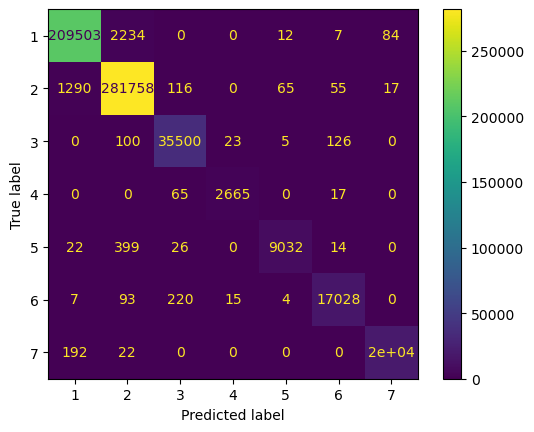

In [66]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(estimator=clf, X=X, y=y);

In [67]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.96      0.94      0.95     42340
           2       0.95      0.97      0.96     56470
           3       0.94      0.97      0.95      7312
           4       0.92      0.85      0.89       545
           5       0.94      0.76      0.84      1887
           6       0.93      0.90      0.92      3472
           7       0.98      0.95      0.96      4177

    accuracy                           0.96    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.96      0.96      0.95    116203



Classifier metrics on the test set
Accurracy: 95.50%


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [73]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [75]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate model using evaluation functions
print("Classifier metrics on the test set")
print(f"Accurracy: {accuracy_score(y_test, y_preds)*100:.2f}%")
print(f"Precision: {precision_score(y_test, y_preds,average='micro')}")
print(f"Recall: {recall_score(y_test, y_preds, average='micro')}")
print(f"F1: {f1_score(y_test, y_preds, average='micro')}")

Classifier metrics on the test set
Accurracy: 95.50%
Precision: 0.9550097673898265
Recall: 0.9550097673898265
F1: 0.9550097673898265


In [76]:
from sklearn.svm import LinearSVC

In [77]:
clf_linSVC = LinearSVC()

In [78]:
clf_linSVC.fit(X_train,y_train)

C:\Users\Parsa\Desktop\heart-disease-project\env\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\Parsa\Desktop\heart-disease-project\env\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVC()

In [79]:
clf_linSVC.score(X_test, y_test)

0.6029104239993804

In [80]:
y_preds = clf_linSVC.predict(X_test)

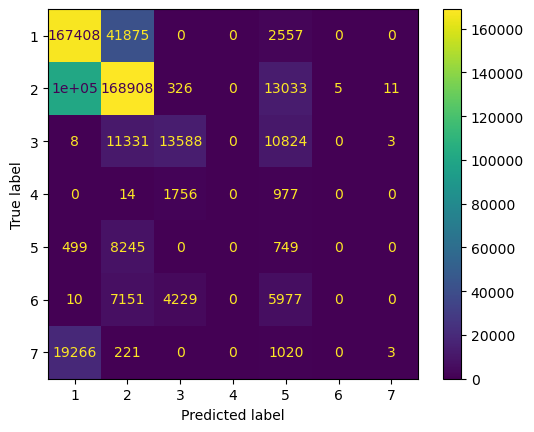

In [81]:
ConfusionMatrixDisplay.from_estimator(estimator=clf_linSVC, X=X, y=y);

In [82]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           1       0.58      0.79      0.67     42340
           2       0.71      0.59      0.65     56470
           3       0.69      0.38      0.49      7312
           4       0.00      0.00      0.00       545
           5       0.02      0.07      0.03      1887
           6       0.00      0.00      0.00      3472
           7       0.25      0.00      0.00      4177

    accuracy                           0.60    116203
   macro avg       0.32      0.26      0.26    116203
weighted avg       0.61      0.60      0.59    116203



C:\Users\Parsa\Desktop\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parsa\Desktop\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Parsa\Desktop\heart-disease-project\env\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta

In [24]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import RandomizedSearchCV
grid = {"n_estimators": [10, 100, 200, 500, 1000],
        "max_depth": [None, 5, 10, 20],
        "max_features": ["sqrt"],
        "min_samples_split": [2, 4, 6],
        "min_samples_leaf": [1, 2, 4]}

np.random.seed(80)

In [27]:
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions=grid, 
                            n_iter=10, # number of models to try
                            cv=2,
                            verbose=2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train, y_train);


Fitting 2 folds for each of 10 candidates, totalling 20 fits
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.5s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=6, n_estimators=200; total time=  11.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.7s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=2, min_samples_split=6, n_estimators=10; total time=   0.6s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000; total time=  44.4s
[CV] END max_depth=20, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=1000

In [28]:
rs_clf.best_params_

{'n_estimators': 500,
 'min_samples_split': 4,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None}

In [34]:
y.unique()

array([1, 2, 7, 6, 3, 4, 5])

In [39]:
rs_clf.score(X_test,y_test)

0.9550527955388415